In [38]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing

import tensorflow as tf
from keras import models
from keras import layers

import math
from sklearn.model_selection import train_test_split, StratifiedKFold
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dense, Dropout, Convolution2D, Conv2D, MaxPooling2D, Lambda, GlobalMaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Activation, AveragePooling2D, Concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.utils import np_utils

from IPython.display import Image
from IPython.core.display import HTML 

%matplotlib inline
keras.backend.set_image_data_format('channels_last')

# Conteúdo Original da Base

## 30k itens e 25 atributos

* **ID**: Um ID referente a cada cliente que, posteriormente, será ignorado uma vez que é irrelevante para o treino.
* **LIMIT_BAL**: A quntidade máxima em dólar de crédito concedido incluindo a parcela individual e para a família. 
* **SEX**: Caso o indivíduo em questão possuir sexo masculino, esse atributo será 1. Caso seja feminino, será 2.
* **EDUCATION**: Referente ao grau de escolaridade do indivíduo. Caso seja 1, trata-se de alguém com pós-graduação. Sendo 2, alguém que possui graduação. Caso tenha estudado até o colegial, irá constar 3 nesse atributo. Para qualquer outro nível de escolaridade, será 4. Quando 5 e 6, não se sabe a escolaridade do indivíduo.
* **MARRIAGE**: Referente ao status de relacionamento. Caso 1, trata-se de um indivíduo casado. Sendo 2, solteiro. Para outro tipo de relacionamento, nesse atributo constará o número 3. Caso o status do indivíduo seja desconhecido, estará 0.
* **AGE**: A idade do indivíduo em anos.
* **PAY_0**: Pagamento referente a Setembro de 2005. Caso 1, o pagamento foi feito devidamente. Caso entre 2 e 8, indica que o pagamento foi feito com atraso sendo o número referente a quantidade de meses desse atraso. Caso seja 9, significa que o pagamento foi feito com 9 ou mais meses de atraso. Para os demais atributos de PAY_2 a PAY_6, a mesma lógica de valores aplica-se.
* **PAY_2**: Pagamento referente a Agosto de 2005.
* **PAY_3**: Pagamento referente a Julho de 2005.
* **PAY_4**: Pagamento referente a Junho de 2005.
* **PAY_5**: Pagamento referente a Maio de 2005.
* **PAY_6**: Pagamento referente a Abril de 2005.
* **BILL_AMT1**: Valor da fatura em Setembro de 2005, em Dólar
* **BILL_AMT2**: Valor da fatura em Agosto de 2005, em Dólar
* **BILL_AMT3**: Valor da fatura em Julho de 2005, em Dólar
* **BILL_AMT4**: Valor da fatura em Junho de 2005, em Dólar
* **BILL_AMT5**: Valor da fatura em Maio de 2005, em Dólar
* **BILL_AMT6**: Valor da fatura em Abril de 2005, em Dólar
* **PAY_AMT1**: Quantia de pagamento anterior em Setembro de 2005, em dólar
* **PAY_AMT2**: Quantia de pagamento anterior em Agosto de 2005, em dólar
* **PAY_AMT3**: Quantia de pagamento anterior em Julho de 2005, em dólar
* **PAY_AMT4**: Quantia de pagamento anterior em Junho de 2005, em dólar
* **PAY_AMT5**: Quantia de pagamento anterior em Maio de 2005, em dólar
* **PAY_AMT6**: Quantia de pagamento anterior em Abril de 2005, em dólar
* **default.payment.next.month**: Referente a inadimplência do indivíduo no próximo mês. Com 1 representando a inadimplência e 0, a adimplência.



### Carregando o arquivo da base, UCI_Credit_Card.csv, e nomeando cada um dos seus atributos originais como explicado acima

In [39]:
df = pd.read_csv("UCI_Credit_Card.csv", names = ["ID","LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6","default.payment.next.month"])
df = df.drop([0])
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [40]:
print("Default Credit Card Clients data -  rows:",df.shape[0]," columns:", df.shape[1])

Default Credit Card Clients data -  rows: 30000  columns: 25


In [41]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,18943,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


## Não há nenhum valor ausente. Todos os atributos estão preenchidos para todos os itens

In [42]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,default.payment.next.month,PAY_6,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,ID
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Aplicando técnicas de IA sem pré-processamento

## kNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

X = (df.drop('default.payment.next.month', axis=1)).drop('ID', axis=1).values
y = df['default.payment.next.month'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

neigh = KNeighborsClassifier(n_neighbors=10)
#TREINAMENTO
neigh.fit(X_train, y_train) 

#TESTE

Test = neigh.predict(X_test)
Real = y_test

KNN_Falhas_Antes = round((np.sum(Test != Real)*100)/(Test.size), 2)
KNN_Acertos_Antes = round((np.sum(Test == Real)*100)/(Test.size), 2)
 

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (KNN_Falhas_Antes, KNN_Acertos_Antes))

21000 foram treinados e  9000 testes foram feitos. Desses, 6977 tiveram resultado correto e 2023 falharam
Resultado: 22.48 falharam e 77.52 acertaram


## K-Means

In [44]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
import numpy as np

X = np.array((df.drop('default.payment.next.month', axis=1)).drop('ID', axis=1).values)
y = np.array(df['default.payment.next.month'].values)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)




clf = NearestCentroid()
#TREINAMENTO
clf.fit(X_train, y_train) 
#TESTE

clf.fit(X_train, y_train)

# clf.predict([[10,7,7,6,4,10,4,1,2], [6,1,1,1,2,1,3,1,1]]) # Saída esperada: array([1, 0])

Test = clf.predict(X_test)
Real = y_test

KMeans_Falhas_Antes = round((np.sum(Test != Real)*100)/(Test.size), 2)
KMeans_Acertos_Antes = round((np.sum(Test == Real)*100)/(Test.size), 2)

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (KMeans_Falhas_Antes, KMeans_Acertos_Antes))

21000 foram treinados e  9000 testes foram feitos. Desses, 4806 tiveram resultado correto e 4194 falharam
Resultado: 46.6 falharam e 53.4 acertaram


## Random Forest

In [45]:
def load_data_kfold(k):
    
    train = df
    
    X_train = np.array((df.drop('default.payment.next.month', axis=1)).drop('ID', axis=1).values)
    
    y_train = np.array(train['default.payment.next.month'].values)
    
    folds = list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(X_train, y_train))
    
    return folds, X_train, y_train

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

RForest_Falhas_Media_Antes = 0
RForest_Acertos_Media_Antes = 0

X = np.array((df.drop('default.payment.next.month', axis=1)).drop('ID', axis=1).values)
y = np.array(df['default.payment.next.month'].values)

rf = RandomForestClassifier(n_estimators = 100)

k = 4
folds, X_train, y_train = load_data_kfold(k)


for j, (train_idx, val_idx) in enumerate(folds):
    
    print('\nFold ',j)
    X_train_cv = X_train[train_idx]
    y_train_cv = y_train[train_idx]
    X_valid_cv = X_train[val_idx]
    y_valid_cv = y_train[val_idx]
    
    rf.fit(X_train_cv,
           y_train_cv) 
    
    Test = rf.predict(X_valid_cv)
    Real = y_valid_cv

    RForest_Falhas_Antes = round((np.sum(Test != Real)*100)/(Test.size), 2)
    RForest_Acertos_Antes = round((np.sum(Test == Real)*100)/(Test.size), 2)
    
    RForest_Falhas_Media_Antes = (RForest_Falhas_Media_Antes + RForest_Falhas_Antes)
    RForest_Acertos_Media_Antes = (RForest_Acertos_Media_Antes + RForest_Acertos_Antes)

    print("Resultado: %s falharam e %s acertaram" % (RForest_Falhas_Antes, RForest_Acertos_Antes))
    
RForest_Falhas_Media_Antes = RForest_Falhas_Media_Antes/k
RForest_Acertos_Media_Antes = RForest_Acertos_Media_Antes/k

print("\nResultado Final (Média dos %s folds): %.2f falharam e %.2f acertaram" % (k, RForest_Falhas_Media_Antes, RForest_Acertos_Media_Antes))


Fold  0
Resultado: 18.15 falharam e 81.85 acertaram

Fold  1
Resultado: 18.41 falharam e 81.59 acertaram

Fold  2
Resultado: 18.61 falharam e 81.39 acertaram

Fold  3
Resultado: 18.05 falharam e 81.95 acertaram

Resultado Final (Média dos 4 folds): 18.30 falharam e 81.69 acertaram


## Keras

In [47]:
model = models.Sequential()
model.add(layers.Dense(46, activation='relu', input_shape=(2460000,)))
model.add(layers.Dense(46, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))



def load_data_kfold(k):
    
    train = df
    
    X_train = np.array((df.drop('default.payment.next.month', axis=1)).drop('ID', axis=1).values)
    
    y_train = np.array(train['default.payment.next.month'].values)
    
    folds = list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(X_train, y_train))
    
    return folds, X_train, y_train

k = 7
folds, X_train, y_train = load_data_kfold(k)

def get_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(46, activation='relu', input_shape=(23,)))
    model.add(layers.Dense(46, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


model = get_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 46)                1104      
_________________________________________________________________
dense_59 (Dense)             (None, 46)                2162      
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 47        
Total params: 3,313
Trainable params: 3,313
Non-trainable params: 0
_________________________________________________________________


In [48]:
Keras_Accuracy_Antes = 0
Keras_Loss_Antes = 0

for j, (train_idx, val_idx) in enumerate(folds):
    
    print('\nFold ',j)
    X_train_cv = X_train[train_idx]
    y_train_cv = y_train[train_idx]
    X_valid_cv = X_train[val_idx]
    y_valid_cv= y_train[val_idx]
    
    name_weights = "final_model_fold" + str(j) + "_weights.h5"
    model = get_model()
    model.fit(X_train_cv,
              y_train_cv,
              epochs=10,
              batch_size=32)
    
    test_loss, test_accuracy = model.evaluate(X_valid_cv, y_valid_cv)
    
    Keras_Accuracy_Antes = (Keras_Accuracy_Antes + test_accuracy)
    Keras_Loss_Antes = (Keras_Loss_Antes + test_loss)
    
    print("Loss: %s | Accuracy: %s" % (test_loss, test_accuracy))


Fold  0
Epoch 1/10
25714/25714 [==============================] - 4s 170us/step - loss: 3.6244 - acc: 0.7750
Epoch 2/10
25714/25714 [==============================] - 1s 56us/step - loss: 3.6105 - acc: 0.7760
Epoch 3/10
25714/25714 [==============================] - 2s 59us/step - loss: 3.5852 - acc: 0.7776
Epoch 4/10
25714/25714 [==============================] - 1s 55us/step - loss: 3.5852 - acc: 0.7776
Epoch 5/10
25714/25714 [==============================] - 1s 56us/step - loss: 3.5852 - acc: 0.7776: 0s - loss: 3.5886 - acc: 0.777
Epoch 6/10
25714/25714 [==============================] - 1s 52us/step - loss: 3.5852 - acc: 0.7776
Epoch 7/10
25714/25714 [==============================] - 1s 47us/step - loss: 3.5852 - acc: 0.7776
Epoch 8/10
25714/25714 [==============================] - 1s 53us/step - loss: 3.5852 - acc: 0.7776
Epoch 9/10
25714/25714 [==============================] - 1s 54us/step - loss: 3.5852 - acc: 0.7776
Epoch 10/10
4286/4286 [==============================] - 0

In [49]:
    Keras_Accuracy_Antes = Keras_Accuracy_Antes/k
    Keras_Loss_Antes = Keras_Loss_Antes/k
    print(Keras_Accuracy_Antes)
    print(Keras_Loss_Antes)

0.7783666775285608
3.5720347926297857


# Discretização e Normalização

## Corrigindo o atributo Marriage
1. Como trata-se de um atributo categórico em que 0 signfica desconhecido, para os que não se sabe o status de relacionamento, serão substituídos por 3, que significa "outros".
2. Para que tenhamos apenas valores binários, serão criadas duas colunas para cada tipo de status Status_married, Status_single, Status_others.

In [50]:
df['MARRIAGE'] = df['MARRIAGE'].apply(lambda x: 3 if x==0 else x)

In [51]:
Status_married = df['MARRIAGE'].astype(int).apply(lambda x: 1 if x == 1 else 0)
Status_single = df['MARRIAGE'].astype(int).apply(lambda x: 1 if x == 2 else 0)
Status_others = df['MARRIAGE'].astype(int).apply(lambda x: 1 if x == 3 else 0)
df = df.drop(['MARRIAGE'], axis=1)
df['Status_married'] = Status_married
df['Status_single'] = Status_single
df['Status_others'] = Status_others

## Corrigindo atributo Education
1. Como trata-se de um atributo categórico em que 5 e 6 significam desconhecido, nos casos em que que não se sabe o grau de escolaridade, serão substrituídos por 4 que significa "outros".
2. Será feita uma normalização transoformando os atributos categóricos em binários, criando 4 colunas referentes a educação.

In [52]:
df['EDUCATION'] = df['EDUCATION'].apply(lambda x: 4 if (x==5 or x==6) else x)

In [53]:
#  EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others)
EDU_graduateschool = df['EDUCATION'].astype(int).apply(lambda x: 1 if x == 1 else 0)
EDU_university = df['EDUCATION'].astype(int).apply(lambda x: 1 if x == 2 else 0)
EDU_highschool = df['EDUCATION'].astype(int).apply(lambda x: 1 if x == 3 else 0)
EDU_others = df['EDUCATION'].astype(int).apply(lambda x: 1 if x == 4 else 0)
df = df.drop(['EDUCATION'], axis=1)
df['EDU_graduateschool'] = EDU_graduateschool
df['EDU_university'] = EDU_university
df['EDU_highschool'] = EDU_highschool
df['EDU_others'] = EDU_others

## Normalizando valores muito grandes
Utilizando MinMaxScaler, a normalização é feita nos atributos LIMIT_BAL, AGE, BILL_AMT1, BILL_AMT2', BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5 e PAY_AMT6

In [54]:
scaler = preprocessing.MinMaxScaler()

df[['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']] = scaler.fit_transform(df[['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].astype(float))


## Normalizando SEX
Para todos que são 2, significando "feminino", será posto 0, ficando com 1 para masculino e 0 para feminino.

In [55]:
df['SEX'] = df['SEX'].astype(int).apply(lambda x: 0 if x == 2 else x)

## Normalizando PAY[0,2,3,4,5 e 6]
### PAY_0

In [56]:
df['PAY_0_duly'] = df['PAY_0'].astype(int).apply(lambda x: 1 if x == -1 else 0)
df['PAY_0_D1'] = df['PAY_0'].astype(int).apply(lambda x: 1 if x == 1 else 0)
df['PAY_0_D2'] = df['PAY_0'].astype(int).apply(lambda x: 1 if x == 2 else 0)
df['PAY_0_D3'] = df['PAY_0'].astype(int).apply(lambda x: 1 if x == 3 else 0)
df['PAY_0_D4'] = df['PAY_0'].astype(int).apply(lambda x: 1 if x == 4 else 0)
df['PAY_0_D5'] = df['PAY_0'].astype(int).apply(lambda x: 1 if x == 5 else 0)
df['PAY_0_D6'] = df['PAY_0'].astype(int).apply(lambda x: 1 if x == 6 else 0)
df['PAY_0_D7'] = df['PAY_0'].astype(int).apply(lambda x: 1 if x == 7 else 0)
df['PAY_0_D8'] = df['PAY_0'].astype(int).apply(lambda x: 1 if x == 8 else 0)
df['PAY_0_D9'] = df['PAY_0'].astype(int).apply(lambda x: 1 if x == 9 else 0)
df = df.drop(['PAY_0'], axis=1)


### PAY_2

In [57]:
df['PAY_2_duly'] = df['PAY_2'].astype(int).apply(lambda x: 1 if x == -1 else 0)
df['PAY_2_D1'] = df['PAY_2'].astype(int).apply(lambda x: 1 if x == 1 else 0)
df['PAY_2_D2'] = df['PAY_2'].astype(int).apply(lambda x: 1 if x == 2 else 0)
df['PAY_2_D3'] = df['PAY_2'].astype(int).apply(lambda x: 1 if x == 3 else 0)
df['PAY_2_D4'] = df['PAY_2'].astype(int).apply(lambda x: 1 if x == 4 else 0)
df['PAY_2_D5'] = df['PAY_2'].astype(int).apply(lambda x: 1 if x == 5 else 0)
df['PAY_2_D6'] = df['PAY_2'].astype(int).apply(lambda x: 1 if x == 6 else 0)
df['PAY_2_D7'] = df['PAY_2'].astype(int).apply(lambda x: 1 if x == 7 else 0)
df['PAY_2_D8'] = df['PAY_2'].astype(int).apply(lambda x: 1 if x == 8 else 0)
df['PAY_2_D9'] = df['PAY_2'].astype(int).apply(lambda x: 1 if x == 9 else 0)
df = df.drop(['PAY_2'], axis=1)


### PAY_3

In [58]:
df['PAY_3_duly'] = df['PAY_3'].astype(int).apply(lambda x: 1 if x == -1 else 0)
df['PAY_3_D1'] = df['PAY_3'].astype(int).apply(lambda x: 1 if x == 1 else 0)
df['PAY_3_D2'] = df['PAY_3'].astype(int).apply(lambda x: 1 if x == 2 else 0)
df['PAY_3_D3'] = df['PAY_3'].astype(int).apply(lambda x: 1 if x == 3 else 0)
df['PAY_3_D4'] = df['PAY_3'].astype(int).apply(lambda x: 1 if x == 4 else 0)
df['PAY_3_D5'] = df['PAY_3'].astype(int).apply(lambda x: 1 if x == 5 else 0)
df['PAY_3_D6'] = df['PAY_3'].astype(int).apply(lambda x: 1 if x == 6 else 0)
df['PAY_3_D7'] = df['PAY_3'].astype(int).apply(lambda x: 1 if x == 7 else 0)
df['PAY_3_D8'] = df['PAY_3'].astype(int).apply(lambda x: 1 if x == 8 else 0)
df['PAY_3_D9'] = df['PAY_3'].astype(int).apply(lambda x: 1 if x == 9 else 0)
df = df.drop(['PAY_3'], axis=1)


### PAY_4

In [59]:
df['PAY_4_duly'] = df['PAY_4'].astype(int).apply(lambda x: 1 if x == -1 else 0)
df['PAY_4_D1'] = df['PAY_4'].astype(int).apply(lambda x: 1 if x == 1 else 0)
df['PAY_4_D2'] = df['PAY_4'].astype(int).apply(lambda x: 1 if x == 2 else 0)
df['PAY_4_D3'] = df['PAY_4'].astype(int).apply(lambda x: 1 if x == 3 else 0)
df['PAY_4_D4'] = df['PAY_4'].astype(int).apply(lambda x: 1 if x == 4 else 0)
df['PAY_4_D5'] = df['PAY_4'].astype(int).apply(lambda x: 1 if x == 5 else 0)
df['PAY_4_D6'] = df['PAY_4'].astype(int).apply(lambda x: 1 if x == 6 else 0)
df['PAY_4_D7'] = df['PAY_4'].astype(int).apply(lambda x: 1 if x == 7 else 0)
df['PAY_4_D8'] = df['PAY_4'].astype(int).apply(lambda x: 1 if x == 8 else 0)
df['PAY_4_D9'] = df['PAY_4'].astype(int).apply(lambda x: 1 if x == 9 else 0)
df = df.drop(['PAY_4'], axis=1)


### PAY_5

In [60]:
df['PAY_5_duly'] = df['PAY_5'].astype(int).apply(lambda x: 1 if x == -1 else 0)
df['PAY_5_D1'] = df['PAY_5'].astype(int).apply(lambda x: 1 if x == 1 else 0)
df['PAY_5_D2'] = df['PAY_5'].astype(int).apply(lambda x: 1 if x == 2 else 0)
df['PAY_5_D3'] = df['PAY_5'].astype(int).apply(lambda x: 1 if x == 3 else 0)
df['PAY_5_D4'] = df['PAY_5'].astype(int).apply(lambda x: 1 if x == 4 else 0)
df['PAY_5_D5'] = df['PAY_5'].astype(int).apply(lambda x: 1 if x == 5 else 0)
df['PAY_5_D6'] = df['PAY_5'].astype(int).apply(lambda x: 1 if x == 6 else 0)
df['PAY_5_D7'] = df['PAY_5'].astype(int).apply(lambda x: 1 if x == 7 else 0)
df['PAY_5_D8'] = df['PAY_5'].astype(int).apply(lambda x: 1 if x == 8 else 0)
df['PAY_5_D9'] = df['PAY_5'].astype(int).apply(lambda x: 1 if x == 9 else 0)
df = df.drop(['PAY_5'], axis=1)


### PAY_6

In [61]:
df['PAY_6_duly'] = df['PAY_6'].astype(int).apply(lambda x: 1 if x == -1 else 0)
df['PAY_6_D1'] = df['PAY_6'].astype(int).apply(lambda x: 1 if x == 1 else 0)
df['PAY_6_D2'] = df['PAY_6'].astype(int).apply(lambda x: 1 if x == 2 else 0)
df['PAY_6_D3'] = df['PAY_6'].astype(int).apply(lambda x: 1 if x == 3 else 0)
df['PAY_6_D4'] = df['PAY_6'].astype(int).apply(lambda x: 1 if x == 4 else 0)
df['PAY_6_D5'] = df['PAY_6'].astype(int).apply(lambda x: 1 if x == 5 else 0)
df['PAY_6_D6'] = df['PAY_6'].astype(int).apply(lambda x: 1 if x == 6 else 0)
df['PAY_6_D7'] = df['PAY_6'].astype(int).apply(lambda x: 1 if x == 7 else 0)
df['PAY_6_D8'] = df['PAY_6'].astype(int).apply(lambda x: 1 if x == 8 else 0)
df['PAY_6_D9'] = df['PAY_6'].astype(int).apply(lambda x: 1 if x == 9 else 0)
df = df.drop(['PAY_6'], axis=1)


## Pondo a classe como ultima coluna


In [62]:
dfClass = df['default.payment.next.month']
df = df.drop(['default.payment.next.month'], axis=1)
df['Class'] = dfClass

# Conteúdo Normalizado

## A base possui 30k itens e 84 atributos

* **ID**: ID of each client
* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* **SEX**: Gender (1 = male, 0 = female)

* **EDU_graduateschool**: EDUCATION is graduate school (1 = yes, 0 = no)
* **EDU_university**: EDUCATION is university (1 = yes, 0 = no)
* **EDU_highschool**: EDUCATION is high school (1 = yes, 0 = no)
* **EDU_others**: EDUCATION is others (1 = yes, 0 = no)

* **AGE**: Age in years

Repayment status in September, 2005
* **PAY_0_duly**: Pay duly
* **PAY_0_D1**: Payment delay for one month (1 = yes, 0 = no)
* **PAY_0_D2**: Payment delay for two months (1 = yes, 0 = no)
* **PAY_0_D3**: Payment delay for three months (1 = yes, 0 = no)
* **PAY_0_D4**: Payment delay for four months (1 = yes, 0 = no)
* **PAY_0_D5**: Payment delay for five months (1 = yes, 0 = no)
* **PAY_0_D6**: Payment delay for six months (1 = yes, 0 = no)
* **PAY_0_D7**: Payment delay for seven months (1 = yes, 0 = no)
* **PAY_0_D8**: Payment delay for eight months (1 = yes, 0 = no)
* **PAY_0_D9**: Payment delay for nine months and above) (1 = yes, 0 = no)

Repayment status in August, 2005
* **PAY_2_duly**: Pay duly (1 = yes, 0 = no)
* **PAY_2_D1**: Payment delay for one month (1 = yes, 0 = no)
* **PAY_2_D2**: Payment delay for two months (1 = yes, 0 = no)
* **PAY_2_D3**: Payment delay for three months (1 = yes, 0 = no)
* **PAY_2_D4**: Payment delay for four months (1 = yes, 0 = no)
* **PAY_2_D5**: Payment delay for five months (1 = yes, 0 = no)
* **PAY_2_D6**: Payment delay for six months (1 = yes, 0 = no)
* **PAY_2_D7**: Payment delay for seven months (1 = yes, 0 = no)
* **PAY_2_D8**: Payment delay for eight months (1 = yes, 0 = no)
* **PAY_2_D9**: Payment delay for nine months and above) (1 = yes, 0 = no)

Repayment status in July, 2005
* **PAY_3_duly**: Pay duly (1 = yes, 0 = no)
* **PAY_3_D1**: Payment delay for one month (1 = yes, 0 = no)
* **PAY_3_D2**: Payment delay for two months (1 = yes, 0 = no)
* **PAY_3_D3**: Payment delay for three months (1 = yes, 0 = no)
* **PAY_3_D4**: Payment delay for four months (1 = yes, 0 = no)
* **PAY_3_D5**: Payment delay for five months (1 = yes, 0 = no)
* **PAY_3_D6**: Payment delay for six months (1 = yes, 0 = no)
* **PAY_3_D7**: Payment delay for seven months (1 = yes, 0 = no)
* **PAY_3_D8**: Payment delay for eight months (1 = yes, 0 = no)
* **PAY_3_D9**: Payment delay for nine months and above) (1 = yes, 0 = no)

Repayment status in June, 2005
* **PAY_4_duly**: Pay duly (1 = yes, 0 = no)
* **PAY_4_D1**: Payment delay for one month (1 = yes, 0 = no)
* **PAY_4_D2**: Payment delay for two months (1 = yes, 0 = no)
* **PAY_4_D3**: Payment delay for three months (1 = yes, 0 = no)
* **PAY_4_D4**: Payment delay for four months (1 = yes, 0 = no)
* **PAY_4_D5**: Payment delay for five months (1 = yes, 0 = no)
* **PAY_4_D6**: Payment delay for six months (1 = yes, 0 = no)
* **PAY_4_D7**: Payment delay for seven months (1 = yes, 0 = no)
* **PAY_4_D8**: Payment delay for eight months (1 = yes, 0 = no)
* **PAY_4_D9**: Payment delay for nine months and above) (1 = yes, 0 = no)

Repayment status in May, 2005
* **PAY_5_duly**: Pay duly (1 = yes, 0 = no)
* **PAY_5_D1**: Payment delay for one month (1 = yes, 0 = no)
* **PAY_5_D2**: Payment delay for two months (1 = yes, 0 = no)
* **PAY_5_D3**: Payment delay for three months (1 = yes, 0 = no)
* **PAY_5_D4**: Payment delay for four months (1 = yes, 0 = no)
* **PAY_5_D5**: Payment delay for five months (1 = yes, 0 = no)
* **PAY_5_D6**: Payment delay for six months (1 = yes, 0 = no)
* **PAY_5_D7**: Payment delay for seven months (1 = yes, 0 = no)
* **PAY_5_D8**: Payment delay for eight months (1 = yes, 0 = no)
* **PAY_5_D9**: Payment delay for nine months and above) (1 = yes, 0 = no)

Repayment status in April, 2005
* **PAY_6_duly**: Pay duly (1 = yes, 0 = no)
* **PAY_6_D1**: Payment delay for one month (1 = yes, 0 = no)
* **PAY_6_D2**: Payment delay for two months (1 = yes, 0 = no)
* **PAY_6_D3**: Payment delay for three months (1 = yes, 0 = no)
* **PAY_6_D4**: Payment delay for four months (1 = yes, 0 = no)
* **PAY_6_D5**: Payment delay for five months (1 = yes, 0 = no)
* **PAY_6_D6**: Payment delay for six months (1 = yes, 0 = no)
* **PAY_6_D7**: Payment delay for seven months (1 = yes, 0 = no)
* **PAY_6_D8**: Payment delay for eight months (1 = yes, 0 = no)
* **PAY_6_D9**: Payment delay for nine months and above) (1 = yes, 0 = no)

* **BILL_AMT1**: Amount of bill statement in September, 2005 (Scaled between -1 and 1)
* **BILL_AMT2**: Amount of bill statement in August, 2005 (Scaled between -1 and 1)
* **BILL_AMT3**: Amount of bill statement in July, 2005 (Scaled between -1 and 1)
* **BILL_AMT4**: Amount of bill statement in June, 2005 (Scaled between -1 and 1)
* **BILL_AMT5**: Amount of bill statement in May, 2005 (Scaled between -1 and 1)
* **BILL_AMT6**: Amount of bill statement in April, 2005 (Scaled between -1 and 1)

* **PAY_AMT1**: Amount of previous payment in September, 2005 (Scaled between -1 and 1)
* **PAY_AMT2**: Amount of previous payment in August, 2005 (Scaled between -1 and 1)
* **PAY_AMT3**: Amount of previous payment in July, 2005 (Scaled between -1 and 1)
* **PAY_AMT4**: Amount of previous payment in June, 2005 (Scaled between -1 and 1)
* **PAY_AMT5**: Amount of previous payment in May, 2005 (Scaled between -1 and 1)
* **PAY_AMT6**: Amount of previous payment in April, 2005 (Scaled between -1 and 1)

Class
* **Class**: Default payment next month (1 = yes, 0 = no)

In [63]:
df.shape
df = df.drop('ID', axis=1)

# kNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier

X = df.drop('Class', axis=1).values
y = df.Class.values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

neigh = KNeighborsClassifier(n_neighbors=10)
#TREINAMENTO
neigh.fit(X_train, y_train) 

#TESTE

Test = neigh.predict(X_test)
Real = y_test

KNN_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
KNN_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)
 

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (KNN_Falhas, KNN_Acertos))

21000 foram treinados e  9000 testes foram feitos. Desses, 7298 tiveram resultado correto e 1702 falharam
Resultado: 18.91 falharam e 81.09 acertaram


# Aplicando Keras

In [65]:
model = models.Sequential()
model.add(layers.Dense(46, activation='relu', input_shape=(2460000,)))
model.add(layers.Dense(46, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))



def load_data_kfold(k):
    
    train = df
    
    X_train = np.array(df.drop('Class', axis=1).values)
    
    y_train = np.array(train["Class"].values)
    
    folds = list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(X_train, y_train))
    
    return folds, X_train, y_train

k = 7
folds, X_train, y_train = load_data_kfold(k)

def get_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(46, activation='relu', input_shape=(82,)))
    model.add(layers.Dense(46, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


model = get_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 46)                3818      
_________________________________________________________________
dense_86 (Dense)             (None, 46)                2162      
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 47        
Total params: 6,027
Trainable params: 6,027
Non-trainable params: 0
_________________________________________________________________


In [66]:
Keras_Accuracy = 0
Keras_Loss = 0

for j, (train_idx, val_idx) in enumerate(folds):
    
    print('\nFold ',j)
    X_train_cv = X_train[train_idx]
    y_train_cv = y_train[train_idx]
    X_valid_cv = X_train[val_idx]
    y_valid_cv= y_train[val_idx]
    
    name_weights = "final_model_fold" + str(j) + "_weights.h5"
#     callbacks = get_callbacks(name_weights = name_weights, patience_lr=10)
#     generator = gen.flow(X_train_cv, y_train_cv, batch_size = batch_size)
    model = get_model()
    model.fit(X_train_cv,
              y_train_cv,
              epochs=10,
              batch_size=32)
    
    test_loss, test_accuracy = model.evaluate(X_valid_cv, y_valid_cv)
    Keras_Accuracy = (Keras_Accuracy + test_accuracy)
    Keras_Loss = (Keras_Loss + test_loss)
    print("Loss: %s | Accuracy: %s" % (test_loss, test_accuracy))


Fold  0
Epoch 1/10
25714/25714 [==============================] - 3s 127us/step - loss: 0.4512 - acc: 0.8149
Epoch 2/10
25714/25714 [==============================] - 1s 55us/step - loss: 0.4382 - acc: 0.8213
Epoch 3/10
25714/25714 [==============================] - 1s 56us/step - loss: 0.4366 - acc: 0.8217
Epoch 4/10
25714/25714 [==============================] - 2s 71us/step - loss: 0.4361 - acc: 0.8222
Epoch 5/10
25714/25714 [==============================] - 2s 90us/step - loss: 0.4352 - acc: 0.8229
Epoch 6/10
25714/25714 [==============================] - 2s 69us/step - loss: 0.4345 - acc: 0.8223: 1s - loss: 
Epoch 7/10
25714/25714 [==============================] - 2s 83us/step - loss: 0.4345 - acc: 0.8220
Epoch 8/10
25714/25714 [==============================] - 2s 70us/step - loss: 0.4341 - acc: 0.8224
Epoch 9/10
25714/25714 [==============================] - 2s 66us/step - loss: 0.4334 - acc: 0.8238
Epoch 10/10
4286/4286 [==============================] - 0s 111us/step
Loss: 

In [67]:
    Keras_Accuracy = Keras_Accuracy/k
    Keras_Loss = Keras_Loss/k
    print(Keras_Accuracy)
    print(Keras_Loss)

0.8195000690846482
0.44019836944798224


# Aplicando K-Means 

In [68]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
import numpy as np

X = np.array(df.drop('Class', axis=1).values)
y = np.array(df.Class.values)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)




clf = NearestCentroid()
#TREINAMENTO
clf.fit(X_train, y_train) 
#TESTE

clf.fit(X_train, y_train)

# clf.predict([[10,7,7,6,4,10,4,1,2], [6,1,1,1,2,1,3,1,1]]) # Saída esperada: array([1, 0])

Test = clf.predict(X_test)
Real = y_test

KMeans_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
KMeans_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (KMeans_Falhas, KMeans_Acertos))

21000 foram treinados e  9000 testes foram feitos. Desses, 7023 tiveram resultado correto e 1977 falharam
Resultado: 21.97 falharam e 78.03 acertaram


# Aplicando Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

RForest_Falhas_Media = 0
RForest_Acertos_Media = 0

X = np.array(df.drop('Class', axis=1).values)
y = np.array(df.Class.values)

rf = RandomForestClassifier(n_estimators = 100)

k = 4
folds, X_train, y_train = load_data_kfold(k)


for j, (train_idx, val_idx) in enumerate(folds):
    
    print('\nFold ',j)
    X_train_cv = X_train[train_idx]
    y_train_cv = y_train[train_idx]
    X_valid_cv = X_train[val_idx]
    y_valid_cv = y_train[val_idx]
    
    rf.fit(X_train_cv,
           y_train_cv) 
    
    Test = rf.predict(X_valid_cv)
    Real = y_valid_cv

    RForest_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
    RForest_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)
    
    RForest_Falhas_Media = (RForest_Falhas_Media + RForest_Falhas)
    RForest_Acertos_Media = (RForest_Acertos_Media + RForest_Acertos)

    print("Resultado: %s falharam e %s acertaram" % (RForest_Falhas, RForest_Acertos))

RForest_Falhas_Media = RForest_Falhas_Media/k
RForest_Acertos_Media = RForest_Acertos_Media/k

print("\nResultado Final (Média dos %s folds): %.2f falharam e %.2f acertaram" % (k, RForest_Falhas_Media, RForest_Acertos_Media))


Fold  0
Resultado: 18.31 falharam e 81.69 acertaram

Fold  1
Resultado: 18.65 falharam e 81.35 acertaram

Fold  2
Resultado: 18.72 falharam e 81.28 acertaram

Fold  3
Resultado: 18.37 falharam e 81.63 acertaram

Resultado Final (Média dos 4 folds): 18.51 falharam e 81.49 acertaram


# Comparação de Resultados


## K-Means

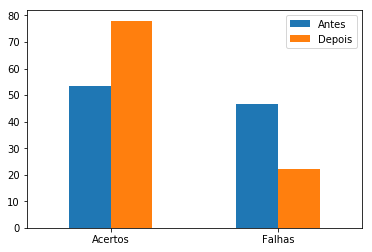

In [70]:
data = {'Antes':[KMeans_Acertos_Antes, KMeans_Falhas_Antes],
        'Depois':[KMeans_Acertos, KMeans_Falhas]} 

# Creates pandas DataFrame. 
dfResultados = pd.DataFrame(data, index =['Acertos', 'Falhas']) 

ax = dfResultados.plot.bar(rot=0)

## kNN

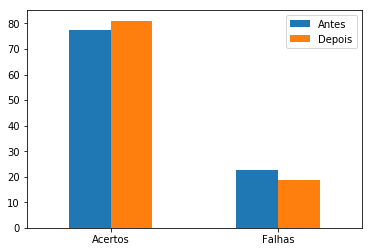

In [71]:
data = {'Antes':[KNN_Acertos_Antes, KNN_Falhas_Antes],
        'Depois':[KNN_Acertos, KNN_Falhas]} 

# Creates pandas DataFrame. 
dfResultados = pd.DataFrame(data, index =['Acertos', 'Falhas']) 

ax = dfResultados.plot.bar(rot=0)

## Keras

Antes 
Accuracy: 0.78  e Loss: 3.57 
Depois 
Accuracy: 0.82  e Loss: 0.44


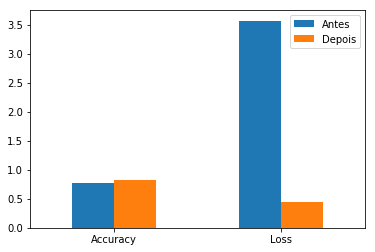

In [72]:
data = {'Antes':[Keras_Accuracy_Antes, Keras_Loss_Antes],
        'Depois':[Keras_Accuracy, Keras_Loss]} 

print("Antes \nAccuracy: %.2f  e Loss: %.2f \nDepois \nAccuracy: %.2f  e Loss: %.2f" % (Keras_Accuracy_Antes, Keras_Loss_Antes, Keras_Accuracy, Keras_Loss))

# Creates pandas DataFrame. 
dfResultados = pd.DataFrame(data, index =['Accuracy', 'Loss']) 

ax = dfResultados.plot.bar(rot=0)

## Random Forest

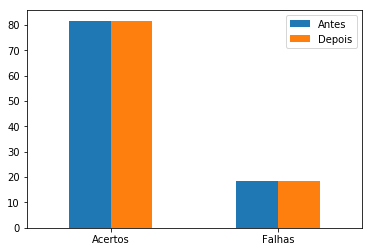

In [73]:
data = {'Antes':[RForest_Acertos_Media_Antes, RForest_Falhas_Media_Antes],
        'Depois':[RForest_Acertos_Media, RForest_Falhas_Media]} 

# Creates pandas DataFrame. 
dfResultados = pd.DataFrame(data, index =['Acertos', 'Falhas']) 

ax = dfResultados.plot.bar(rot=0)

## Resultados Gerais

In [1]:

data = {'K-Means':[KMeans_Acertos_Antes, KMeans_Acertos, KMeans_Falhas_Antes, KMeans_Falhas],
        'Random Forest':[RForest_Acertos_Media_Antes, RForest_Acertos_Media, RForest_Falhas_Media_Antes, RForest_Falhas_Media],
        'kNN':[KNN_Acertos_Antes, KNN_Acertos, KNN_Falhas_Antes, KNN_Falhas]} 
 
    
# Creates pandas DataFrame. 
dfResultados = pd.DataFrame(data, index =['Acertos Antes', 'Acertos Depois', 'Erros Antes', 'Erros Depois']) 


ax = dfResultados.plot.bar(rot=0)




NameError: name 'KMeans_Acertos_Antes' is not defined